Observations and analysis:

1. The maximum temperature increases as you move closer to the equator. Looking at the Northern Hemisphere vs Max temp graph for example, max temp for the cities decrease as the latitude goes towards 0.
2. There is no significant linear correlation between latitude and humidity. The graph shows though, that most of the cities fall between 60-100% range of humidity. 
3. There is no significant linear correlation between latitude and wind speed, but majority of the citities have wind speed of 15mph and less. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [3]:
df=pd.DataFrame({"City":cities}) 
df['Lat'] = ""
df['Lng'] = ""
df['Max Temp'] = ""
df['Humidity'] = ""
df['Cloudiness'] = ""
df['Wind Speed'] = ""
df['Country'] = ""
df['Date'] = ""

url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units=imperial&q="

print("Beginning Data Retrieval")
print("-----------------------------")

results= requests.get(query_url + 'east london').json()

for index,row in df.iterrows():
    city = row['City']
    print(f"Processing Record {index} of Set {index} | {city}.")
    results= requests.get(query_url + city).json()
    try:
        df.loc[index, 'Lat'] = results['coord']['lat']
        df.loc[index, 'Lng'] = results['coord']['lon']
        df.loc[index, 'Max Temp'] = results['main']['temp_max']
        df.loc[index, 'Humidity'] = results['main']['humidity']
        df.loc[index, 'Cloudiness'] = results['clouds']['all']
        df.loc[index, 'Wind Speed'] = results['wind']['speed']
        df.loc[index, 'Country'] = results['sys']['country']
        df.loc[index, 'Date'] = results['dt']
        
    except (KeyError, IndexError):
        print(f"City not found. Skipping...")
        
    print("---------------------------")
    
print("Data Retrieval Complete") 
print("------------------------------")
        


Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 0 | taolanaro.
City not found. Skipping...
---------------------------
Processing Record 1 of Set 1 | ovre ardal.
---------------------------
Processing Record 2 of Set 2 | kapaa.
---------------------------
Processing Record 3 of Set 3 | tagusao.
---------------------------
Processing Record 4 of Set 4 | longyearbyen.
---------------------------
Processing Record 5 of Set 5 | moindou.
---------------------------
Processing Record 6 of Set 6 | urucara.
---------------------------
Processing Record 7 of Set 7 | ponta do sol.
---------------------------
Processing Record 8 of Set 8 | vaini.
---------------------------
Processing Record 9 of Set 9 | hobart.
---------------------------
Processing Record 10 of Set 10 | meulaboh.
---------------------------
Processing Record 11 of Set 11 | rikitea.
---------------------------
Processing Record 12 of Set 12 | doctor pedro p. pena.
City not found. Skipping...
---

---------------------------
Processing Record 113 of Set 113 | karachi.
---------------------------
Processing Record 114 of Set 114 | bac lieu.
---------------------------
Processing Record 115 of Set 115 | te anau.
---------------------------
Processing Record 116 of Set 116 | kruisfontein.
---------------------------
Processing Record 117 of Set 117 | lyuban.
---------------------------
Processing Record 118 of Set 118 | guipos.
---------------------------
Processing Record 119 of Set 119 | changping.
---------------------------
Processing Record 120 of Set 120 | emba.
---------------------------
Processing Record 121 of Set 121 | taltal.
---------------------------
Processing Record 122 of Set 122 | alofi.
---------------------------
Processing Record 123 of Set 123 | rosetta.
---------------------------
Processing Record 124 of Set 124 | zyryanka.
---------------------------
Processing Record 125 of Set 125 | kodiak.
---------------------------
Processing Record 126 of Set 126 | l

---------------------------
Processing Record 224 of Set 224 | pitimbu.
---------------------------
Processing Record 225 of Set 225 | axim.
---------------------------
Processing Record 226 of Set 226 | taoudenni.
---------------------------
Processing Record 227 of Set 227 | beitbridge.
---------------------------
Processing Record 228 of Set 228 | bahia blanca.
---------------------------
Processing Record 229 of Set 229 | khudumelapye.
---------------------------
Processing Record 230 of Set 230 | otorohanga.
---------------------------
Processing Record 231 of Set 231 | port elizabeth.
---------------------------
Processing Record 232 of Set 232 | saint-georges.
---------------------------
Processing Record 233 of Set 233 | tabuk.
---------------------------
Processing Record 234 of Set 234 | palmer.
---------------------------
Processing Record 235 of Set 235 | dudinka.
---------------------------
Processing Record 236 of Set 236 | lieksa.
---------------------------
Processing R

---------------------------
Processing Record 340 of Set 340 | gushikawa.
---------------------------
Processing Record 341 of Set 341 | qostanay.
---------------------------
Processing Record 342 of Set 342 | neuquen.
---------------------------
Processing Record 343 of Set 343 | new norfolk.
---------------------------
Processing Record 344 of Set 344 | omsukchan.
---------------------------
Processing Record 345 of Set 345 | menongue.
---------------------------
Processing Record 346 of Set 346 | rolim de moura.
City not found. Skipping...
---------------------------
Processing Record 347 of Set 347 | ouadda.
---------------------------
Processing Record 348 of Set 348 | vaitupu.
City not found. Skipping...
---------------------------
Processing Record 349 of Set 349 | hamilton.
---------------------------
Processing Record 350 of Set 350 | alta floresta.
---------------------------
Processing Record 351 of Set 351 | sheopur.
---------------------------
Processing Record 352 of Set 

---------------------------
Processing Record 448 of Set 448 | pandamatenga.
---------------------------
Processing Record 449 of Set 449 | lucapa.
---------------------------
Processing Record 450 of Set 450 | camana.
---------------------------
Processing Record 451 of Set 451 | masterton.
---------------------------
Processing Record 452 of Set 452 | alexandria.
---------------------------
Processing Record 453 of Set 453 | tupik.
---------------------------
Processing Record 454 of Set 454 | pavlodar.
---------------------------
Processing Record 455 of Set 455 | muros.
---------------------------
Processing Record 456 of Set 456 | toro.
---------------------------
Processing Record 457 of Set 457 | uhlove.
---------------------------
Processing Record 458 of Set 458 | nemuro.
---------------------------
Processing Record 459 of Set 459 | rocha.
---------------------------
Processing Record 460 of Set 460 | yomitan.
City not found. Skipping...
---------------------------
Processing

---------------------------
Processing Record 557 of Set 557 | sai buri.
---------------------------
Processing Record 558 of Set 558 | khategaon.
---------------------------
Processing Record 559 of Set 559 | grande-riviere.
City not found. Skipping...
---------------------------
Processing Record 560 of Set 560 | bur gabo.
City not found. Skipping...
---------------------------
Processing Record 561 of Set 561 | bam.
---------------------------
Processing Record 562 of Set 562 | dno.
---------------------------
Processing Record 563 of Set 563 | broken hill.
---------------------------
Processing Record 564 of Set 564 | bestobe.
---------------------------
Processing Record 565 of Set 565 | sibolga.
---------------------------
Processing Record 566 of Set 566 | tukrah.
---------------------------
Processing Record 567 of Set 567 | uvira.
---------------------------
Processing Record 568 of Set 568 | avera.
---------------------------
Processing Record 569 of Set 569 | vera cruz.
----

In [4]:
df.count()

City          618
Lat           618
Lng           618
Max Temp      618
Humidity      618
Cloudiness    618
Wind Speed    618
Country       618
Date          618
dtype: int64

In [5]:
df[["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed", "Date"]]=df[["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed", "Date"]].apply(pd.to_numeric,errors="coerce")


df = df.dropna(axis=0,how="any")
df = df.drop(df[df['Humidity'] > 100].index)
df.count()
df.to_csv(output_data_file)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,ovre ardal,61.32,7.80,66.2,48.0,40.0,4.70,NO,1.594828e+09
2,kapaa,22.08,-159.32,78.8,83.0,90.0,14.99,US,1.594828e+09
3,tagusao,9.19,117.81,81.0,78.0,8.0,4.34,PH,1.594828e+09
4,longyearbyen,78.22,15.64,48.2,61.0,75.0,5.82,SJ,1.594828e+09
5,moindou,-21.69,165.68,68.0,82.0,90.0,6.93,NC,1.594828e+09


This code creates a scatter plot that compares the relationship between latitudes and max temperature of all the cities.


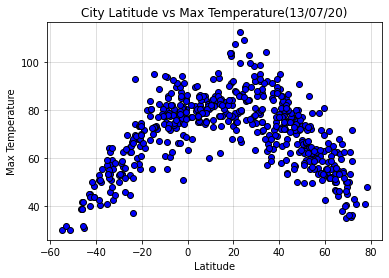

In [6]:
plt.scatter(df["Lat"], df["Max Temp"], facecolor="b",edgecolor='black')
plt.title("City Latitude vs Max Temperature(13/07/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(linestyle='-',color='black',linewidth=.5,alpha=.25)
plt.savefig("latvstemp.png")

print("This code creates a scatter plot that compares the relationship between latitudes and max temperature of all the cities.")

This code takes the lat column values for each city and humidity amount for each city, and plots it into a scatter graph. It compares the relationship between latitudes from -60 to 80 and the humidity.


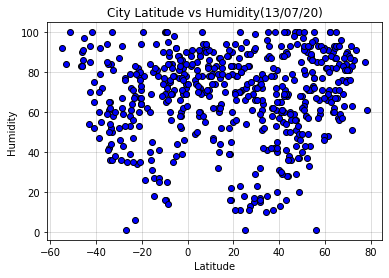

In [7]:
plt.scatter(df["Lat"], df["Humidity"], facecolor="b",edgecolor='black')
plt.title("City Latitude vs Humidity(13/07/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(linestyle='-',color='black',linewidth=.5,alpha=.25)
plt.savefig("latvshum.png")

print("This code takes the lat column values for each city and humidity amount for each city, and plots it into a scatter graph. It compares the relationship between latitudes from -60 to 80 and the humidity.")

This code takes the lat column values for each city and cloudiness for each city, and plots it into a scatter graph. It compares the relationship between latitudes from -60 to 80 and the cloudiness.


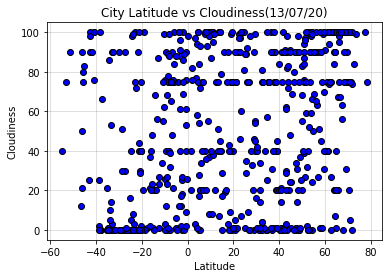

In [8]:
plt.scatter(df["Lat"], df["Cloudiness"], facecolor="b",edgecolor='black')
plt.title("City Latitude vs Cloudiness(13/07/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(linestyle='-',color='black',linewidth=.5,alpha=.25)
plt.savefig("latvscloud.png")

print("This code takes the lat column values for each city and cloudiness for each city, and plots it into a scatter graph. It compares the relationship between latitudes from -60 to 80 and the cloudiness.")

This code takes the lat column values for each city and wind speed values for each city, and plots it into a scatter graph. It compares the relationship between latitudes from -60 to 80 and the wind speed.


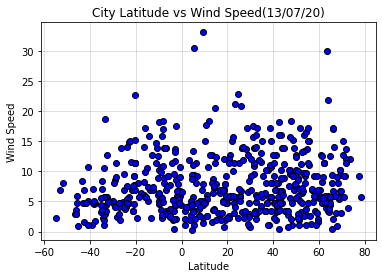

In [9]:
plt.scatter(df["Lat"], df["Wind Speed"], facecolor="b",edgecolor='black')
plt.title("City Latitude vs Wind Speed(13/07/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(linestyle='-',color='black',linewidth=.5,alpha=.25)
plt.savefig("latvswind.png")

print("This code takes the lat column values for each city and wind speed values for each city, and plots it into a scatter graph. It compares the relationship between latitudes from -60 to 80 and the wind speed.")

In [10]:
northern_df = df.loc[df["Lat"] > 0]
southern_df = df.loc[df["Lat"] < 0]

The r-squared is: 0.4957617866713326


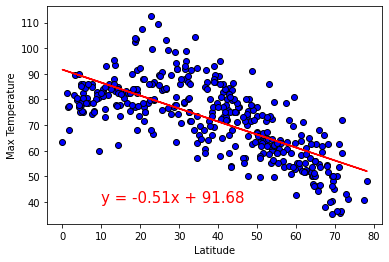

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(northern_df["Lat"], northern_df["Max Temp"], facecolor="b",edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Lat"], northern_df["Max Temp"])
regress_values = northern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_df["Lat"], regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("nlatvstemp.png")

The r-squared is: 0.7137917371776604


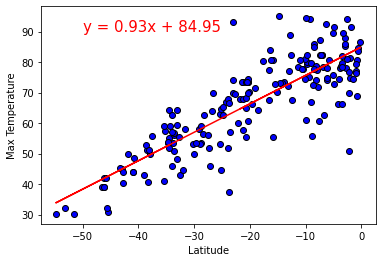

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(southern_df["Lat"], southern_df["Max Temp"], facecolor="b",edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Lat"], southern_df["Max Temp"])
regress_values = southern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_df["Lat"], regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("slatvstemp.png")

According to the 2 graphs, as the city's latitude moves closer to 0, max temp increases.

The r-squared is: 0.005884519497541503


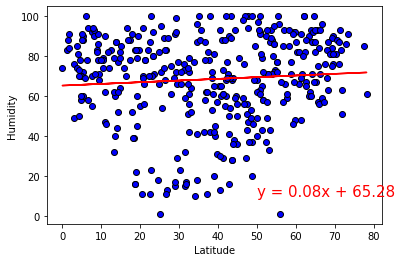

<Figure size 432x288 with 0 Axes>

In [13]:
plt.scatter(northern_df["Lat"], northern_df["Humidity"], facecolor="b",edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Lat"], northern_df["Humidity"])
regress_values = northern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_df["Lat"], regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("nlatvshum.png")

The r-squared is: 0.0006037123671244406


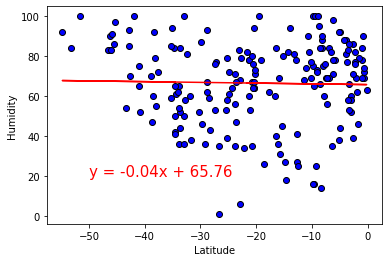

<Figure size 432x288 with 0 Axes>

In [14]:
plt.scatter(southern_df["Lat"], southern_df["Humidity"], facecolor="b",edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Lat"], southern_df["Humidity"])
regress_values = southern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_df["Lat"], regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("slatvshum.png")

No significant correlation of northern vs southern latitudes and humidity.

The r-squared is: 0.010556899663233785


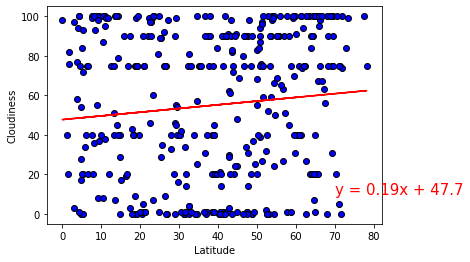

<Figure size 432x288 with 0 Axes>

In [15]:
plt.scatter(northern_df["Lat"], northern_df["Cloudiness"], facecolor="b",edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Lat"], northern_df["Cloudiness"])
regress_values = northern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_df["Lat"], regress_values,"r-")
plt.annotate(line_eq,(70,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("nlatvscloud.png")

The r-squared is: 0.009332427315795661


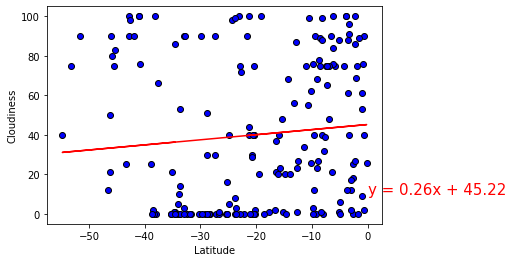

<Figure size 432x288 with 0 Axes>

In [16]:
plt.scatter(southern_df["Lat"], southern_df["Cloudiness"], facecolor="b",edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Lat"], southern_df["Cloudiness"])
regress_values = southern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_df["Lat"], regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("slatvscloud.png")

No significant linear correlation between latitude and cloudiness.

The r-squared is: 0.0037560872892579843


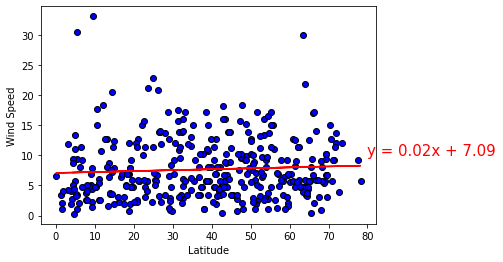

<Figure size 432x288 with 0 Axes>

In [17]:
plt.scatter(northern_df["Lat"], northern_df["Wind Speed"], facecolor="b",edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Lat"], northern_df["Wind Speed"])
regress_values = northern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_df["Lat"], regress_values,"r-")
plt.annotate(line_eq,(80,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("nlatvswing.png")

The r-squared is: 0.059192902744028955


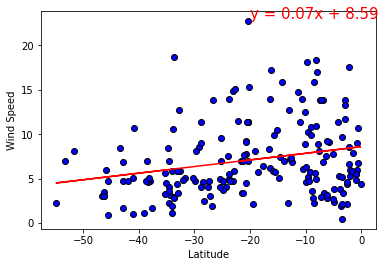

<Figure size 432x288 with 0 Axes>

In [18]:
plt.scatter(southern_df["Lat"], southern_df["Wind Speed"], facecolor="b",edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Lat"], southern_df["Wind Speed"])
regress_values = southern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_df["Lat"], regress_values,"r-")
plt.annotate(line_eq,(-20,23),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("slatvswing.png")

No significant linear correlation between wind speed and latitudes.